In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random as ran
import os

In [2]:
FAST_RUN = False
IMAGE_WIDTH = 525
IMAGE_HEIGHT = 525
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [3]:
categories = []
f_names = os.listdir("./data/total2")

for f in f_names:
    category = f.split('_')[-1][0]
    if category == 'W':
        categories.append(0)
    else:
        categories.append(1)
    
pd.set_option('display.max_row', None)
df = pd.DataFrame({
    'filename': f_names,
    'category': categories
})

df

,filename,category
0,1_Q12_WRONG TEXT (10).jpg,0
1,1_Q12_WRONG TEXT (11).jpg,0
2,1_Q12_WRONG TEXT (2).jpg,0
3,1_Q12_WRONG TEXT (3).jpg,0
4,1_Q12_WRONG TEXT (4).jpg,0
5,1_Q12_WRONG TEXT (5).jpg,0
6,1_Q12_WRONG TEXT (6).jpg,0
7,1_Q12_WRONG TEXT (7).jpg,0
8,1_Q12_WRONG TEXT (8).jpg,0
9,1_Q12_WRONG TEXT (9).jpg,0


0    98
1    98
Name: category, dtype: int64

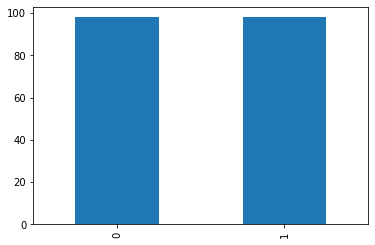

In [4]:
df['category'].value_counts().plot.bar()
df['category'].value_counts()

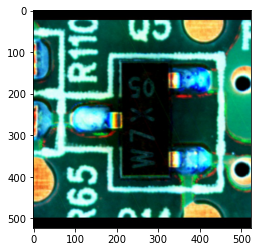

In [5]:
sample = ran.choice(f_names)
image = load_img("./data/total2/"+sample)
plt.imshow(image)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
import keras

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.7))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.7))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.7))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

# activate function - relu
# rmsprop 정확도 65% 이므로 sgd로 변경.
# sgd  정확도 70%  val_loss가 증가하는 문제.
# adam 정확도 73$ 그래프 조금 더 예쁘긴 하지만 아직 부족.
# adagrad train_acc와 val_acc가 증가하긴 하지만 val_loss가 너무 많이 증가함.
# adadelta acc 그래프도 너무 이상하고 loss그래프도 이상하고 최종 정확도 50에 이전부터 60%를 넘지 못함.

#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum= 0.9, nesterov=True)
#adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
rmsprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0) # 정확도 72 , val_loss가 너무 많이 오름. 
# adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0) #최종 정확도 64%.

# activate function - Swish
# rmsprop val_loss가 너무 많이 증가하고 val_acc가 고정이 돼버린다.

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 523, 523, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 523, 523, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 261, 261, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 261, 261, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 259, 259, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 259, 259, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 129, 129, 64)      0

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=5)

In [8]:
LearningRateReduction = ReduceLROnPlateau(monitor='val_accuracy',
                                          patience=2,                 # epoch 10동안 개선되지 않을 시 callback 호출
                                          verbose=1,
                                          factor=0.5,                 # callback 호출시 학습률을 1/2로 줄여준다. 
                                          min_lr=0.00001)

In [9]:
callbacks = [earlystop, LearningRateReduction]

In [10]:
df["category"] = df["category"].replace({0: 'NG', 1: 'GOOD'})

In [11]:
from sklearn.model_selection import train_test_split

train_df, validation_df = train_test_split(df, test_size=0.30, random_state=42) 
# random_state : 세트를 섞을 때 해당 int값을 보고 섞어 하이퍼 파라미터를 튜닝 시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지한다.
# shuffle : split을 해주기 이전에 섞을건지 여부. 보통 default 설정 - True

train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

NG      71
GOOD    66
Name: category, dtype: int64

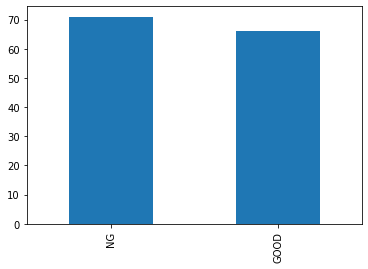

In [12]:
train_df['category'].value_counts().plot.bar()
train_df['category'].value_counts()

GOOD    32
NG      27
Name: category, dtype: int64

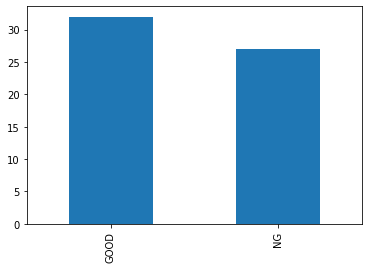

In [13]:
validation_df['category'].value_counts().plot.bar()
validation_df['category'].value_counts()

In [14]:
total_train = train_df.shape[0]     # train 데이터 수
total_validate = validation_df.shape[0] # validation 데이터 수
batch_size=5

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255) # rescale을 통해 정규화만 진행하고 그대로 불러오기
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "./data/total2/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 137 validated image filenames belonging to 2 classes.


In [16]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    "./data/total2/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 59 validated image filenames belonging to 2 classes.


In [17]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps= total_validate // batch_size,
    steps_per_epoch = total_train // batch_size,
    callbacks = callbacks
)

score = model.evaluate(validation_generator,steps = 5)
print("예측의 정확도는 {}% 입니다.".format(score[1]*100))


Epoch 1/50
27/27 [==============================] - 240s 9s/step - loss: 0.9005 - accuracy: 0.6742 - val_loss: 9.2656 - val_accuracy: 0.5636
Epoch 2/50
27/27 [==============================] - 278s 10s/step - loss: 0.7567 - accuracy: 0.7500 - val_loss: 15.3097 - val_accuracy: 0.5455
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.7424
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
27/27 [==============================] - 277s 10s/step - loss: 0.6728 - accuracy: 0.7424 - val_loss: 29.4410 - val_accuracy: 0.5273
Epoch 4/50
27/27 [==============================] - 272s 10s/step - loss: 0.6927 - accuracy: 0.7424 - val_loss: 39.2710 - val_accuracy: 0.5455
Epoch 5/50
27/27 [==============================] - ETA: 0s - loss: 0.4924 - accuracy: 0.8485
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
27/27 [==============================] - 276s 10s/step - loss: 0.4924 - accuracy: 0.8485 - va

In [18]:
model.save_weights('model02.h5') 

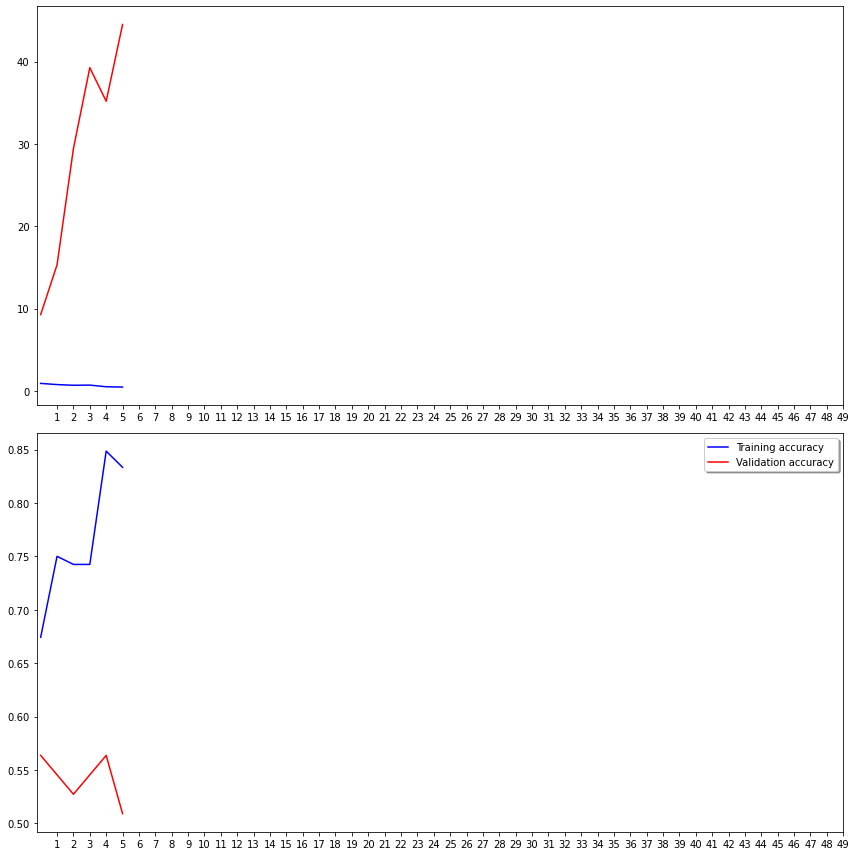

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
#ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

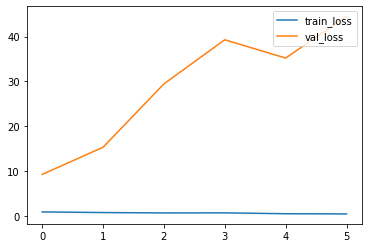

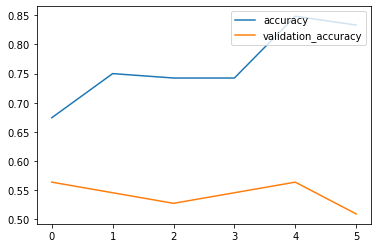

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'validation_accuracy'], loc = 'upper right')
plt.show()

# Test

test_filenames = os.listdir("./data/NG/")
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]

In [21]:
test_filenames = os.listdir("./data/NG/")
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]

In [22]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "./data/NG/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 98 validated image filenames.


In [23]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [24]:
test_df['category'] = np.argmax(predict, axis=-1)

In [25]:
test_df['category'] = test_df['category'].replace({'NG':0, 'GOOD':1})

<AxesSubplot:>

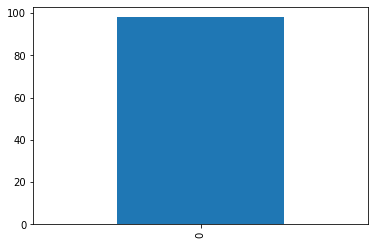

In [26]:
test_df['category'].value_counts().plot.bar()

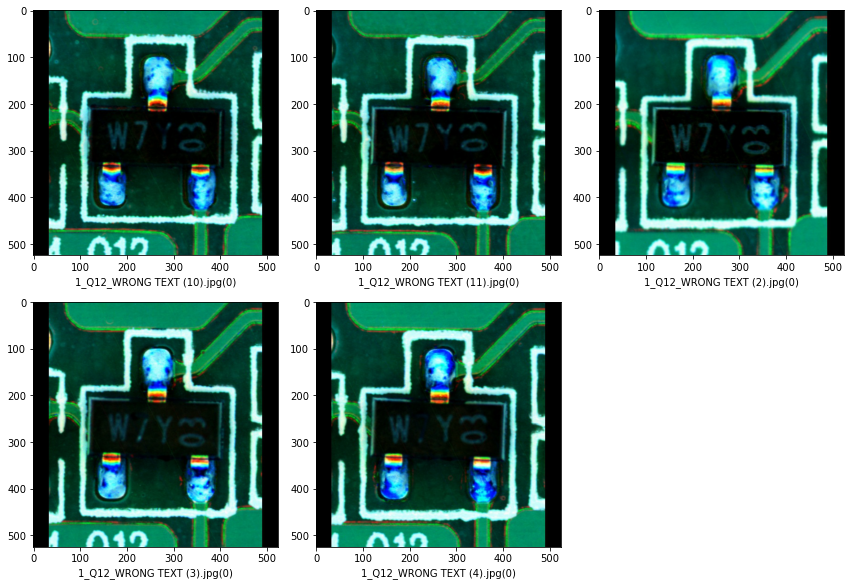

In [27]:
sample_test = test_df.head()
sample_test.head()
plt.figure(figsize=(12,24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./data/NG/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
    
plt.tight_layout()
plt.show()

In [28]:
%pwd

'C:\\Users\\user\\jupyter'